In [2]:
using Plots
pyplot()
plot();

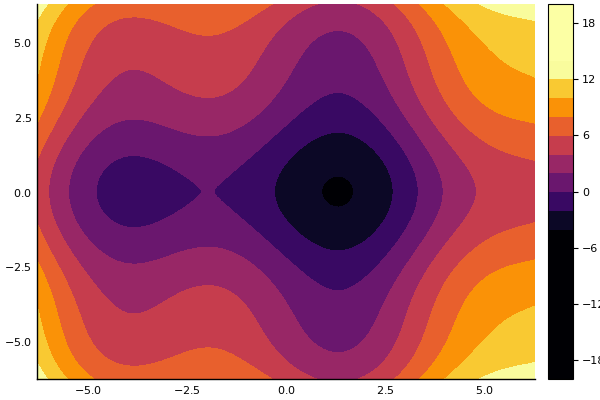

In [4]:
x = collect(range(-2pi,stop=2pi,length=100))
y = x
PyPlot.figure()
Fun = (x,y) -> -2*sin(x) - cos(y) + 1/5. .* (x-2) .* (x+2) + 1/5. .* (y-2) .* (y+2)
f = contour(x,y,Fun,fill=true, levels=-20:2:20)
f

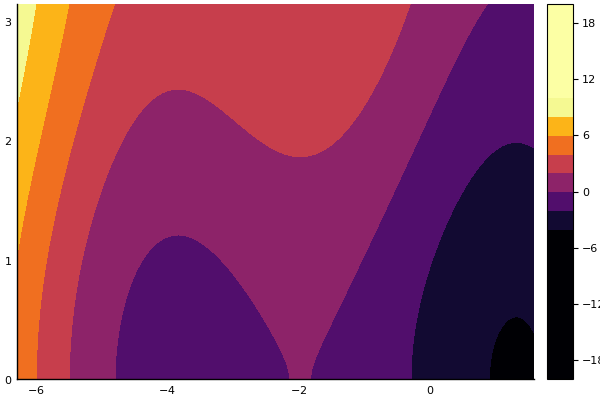

In [5]:
x = collect(range(-2pi,stop=pi/2,length=100))
y = collect(range(0,stop=pi,length=100))
contour(x,y,Fun,fill=true, levels=-20:2:20)

R = [-6.283185307179586 3.141592653589793; 0.0 3.141592653589793]
R = [-6.283185307179586 -1.5707963267948966; 0.0 1.5707963267948966]
R = [-6.283185307179586 -3.9269908169872414; 0.0 0.7853981633974483]
R = [-5.105088062083414 -3.9269908169872414; 0.0 0.39269908169872414]
R = [-5.105088062083414 -4.516039439535328; 0.0 0.19634954084936207]
R = [-4.810563750809371 -4.516039439535328; 0.0 0.09817477042468103]
R = [-4.810563750809371 -4.663301595172349; 0.0 0.04908738521234052]
R = [-4.810563750809371 -4.736932672990861; 0.0 0.02454369260617026]
R = [-4.810563750809371 -4.7737482119001164; 0.0 0.01227184630308513]


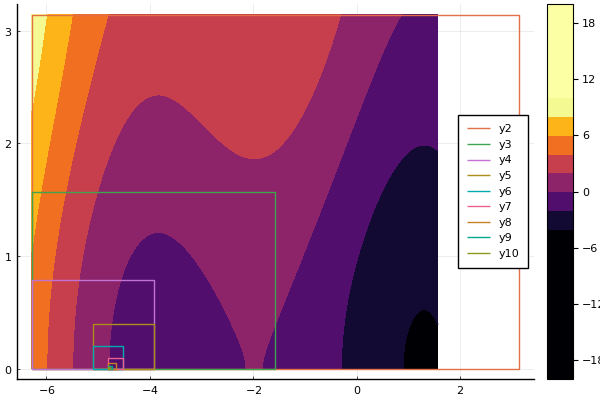

In [17]:
using Statistics
R = [-2pi pi; 0 pi]
x = collect(range(-2pi,stop=pi/2,length=100))
y = collect(range(0,stop=pi,length=100))
f = contour(x,y,Fun,fill=true, levels=-20:2:20)

function validrect(f,xind,yind)
    fsub = f[xind,yind]
    npos = sum(fsub.>0)
    nneg = sum(fsub.<0)
    if npos == 4 || nneg == 4
        return false
    end
    return true
end
function bisect2d(Fun,R,nsteps)
    @show R
    plot!([R[1,1] R[1,2] R[1,2] R[1,1] R[1,1]]',
    [R[2,1] R[2,1] R[2,2] R[2,2] R[2,1]]')
    Rinit = R
    Rmid = [R[1,1] mean(R[1,:]) R[1,2]; R[2,1] mean(R[2,:]) R[2,2]]
    R = Rmid
    f = zeros(3,3)
    for xi=1:3
        for yi=1:3
            f[xi,yi] = Fun(R[1,xi], R[2,yi])
        end
    end
    if nsteps==0
        return Rinit
    end
    @assert(validrect(f,[1,3],[1,3]))
    if validrect(f,[1,2],[1,2])
        return bisect2d(Fun,[R[1,1] R[1,2];R[2,1] R[2,2]],nsteps-1)
    elseif validrect(f,[2,3],[1,2])
        return bisect2d(Fun,[R[1,2] R[1,3];R[2,1] R[2,2]],nsteps-1)
    elseif validrect(f,[1,2],[2,3])
        return bisect2d(Fun,[R[1,1] R[1,2];R[2,2] R[2,3]],nsteps-1)
    elseif validrect(f,[2,3],[2,3])   
        return bisect2d(Fun,[R[1,2] R[1,3];R[2,2] R[2,3]],nsteps-1)
    else
        @assert(false)
    end 
end
bisect2d(Fun,R,8)
f